In [11]:
import polars as pl
from plotnine import *

In [12]:
# Just take the 1st community from each example
knowns = [10*i for i in range(11)]

dfs = []
for known in knowns:
    df = pl.read_csv(f'output_singlem/singlem/known{known}/marine0.smf', separator='\t')
    df = df.with_columns(pl.lit(known).alias('known'))
    dfs.append(df)

df = pl.concat(dfs)
df

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,known
str,i64,i64,f64,i64,str,i32
"""marine0.1""",5985974985,6027455700,99.31,3649985,null,0
"""marine0.1""",6651981388,6785814600,98.03,4141492,null,10
"""marine0.1""",5767886379,5924916300,97.35,3718698,null,20
"""marine0.1""",6532226720,6597711300,99.01,4029428,null,30
"""marine0.1""",5885363364,5954024700,98.85,3683763,null,40
"""marine0.1""",7034148915,6991309200,100.0,4274623,null,50
"""marine0.1""",4880620562,4950014100,98.6,3020915,null,60
"""marine0.1""",6156370865,6180967800,99.6,3749153,null,70
"""marine0.1""",5063392526,4819163100,100.0,3156827,null,80


In [14]:
df = df.with_columns(pl.col('bacterial_archaeal_bases').alias('smf')/pl.col('metagenome_size')*100)
df

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,known,smf
str,i64,i64,f64,i64,str,i32,f64
"""marine0.1""",5985974985,6027455700,99.31,3649985,null,0,99.311804
"""marine0.1""",6651981388,6785814600,98.03,4141492,null,10,98.02775
"""marine0.1""",5767886379,5924916300,97.35,3718698,null,20,97.349669
"""marine0.1""",6532226720,6597711300,99.01,4029428,null,30,99.007465
"""marine0.1""",5885363364,5954024700,98.85,3683763,null,40,98.846808
"""marine0.1""",7034148915,6991309200,100.0,4274623,null,50,100.612757
"""marine0.1""",4880620562,4950014100,98.6,3020915,null,60,98.598114
"""marine0.1""",6156370865,6180967800,99.6,3749153,null,70,99.602054
"""marine0.1""",5063392526,4819163100,100.0,3156827,null,80,105.06788


In [24]:
df

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,known,smf,novelty
str,i64,i64,f64,i64,str,i32,f64,i32
"""marine0.1""",5985974985,6027455700,99.31,3649985,null,0,99.311804,100
"""marine0.1""",6651981388,6785814600,98.03,4141492,null,10,98.02775,90
"""marine0.1""",5767886379,5924916300,97.35,3718698,null,20,97.349669,80
"""marine0.1""",6532226720,6597711300,99.01,4029428,null,30,99.007465,70
"""marine0.1""",5885363364,5954024700,98.85,3683763,null,40,98.846808,60
"""marine0.1""",7034148915,6991309200,100.0,4274623,null,50,100.612757,50
"""marine0.1""",4880620562,4950014100,98.6,3020915,null,60,98.598114,40
"""marine0.1""",6156370865,6180967800,99.6,3749153,null,70,99.602054,30
"""marine0.1""",5063392526,4819163100,100.0,3156827,null,80,105.06788,20


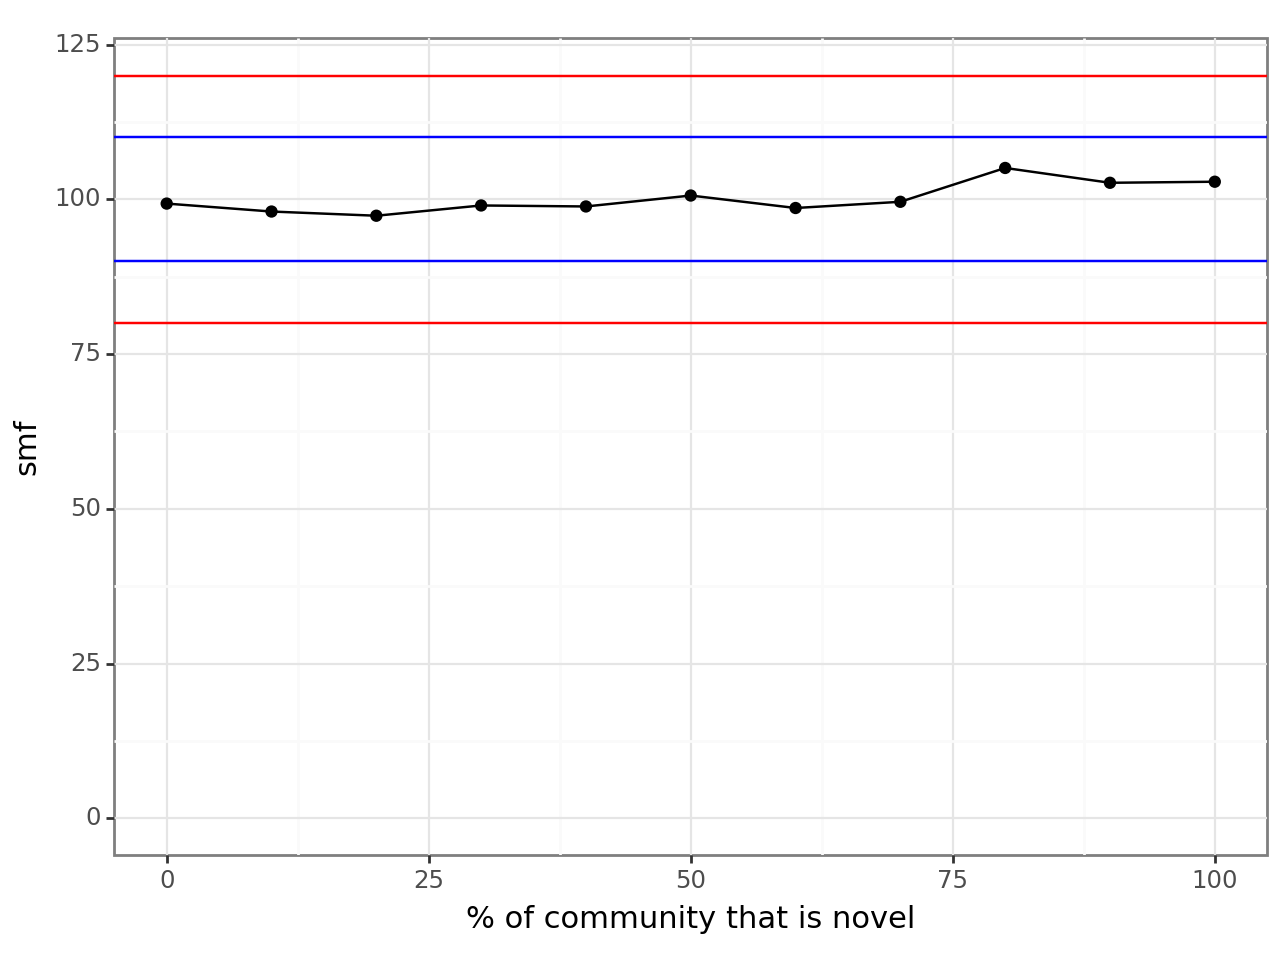

<Figure Size: (640 x 480)>

In [27]:
# df = df.with_columns((100-pl.col('known').cast(pl.Int32)).alias('novelty'))

# 0-100% y-axis
ggplot(df, aes(x='known', y='smf')) + geom_point() + theme_bw() + ylim(0,120) + geom_line() + labs(x='% of community that is novel') + geom_hline(yintercept=[110,90], colour='blue') + geom_hline(yintercept=[120,80], colour='red')